In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2023-10-09 08:47:02--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: 'data.csv.9'

     0K .......... .......... .......... .......... ..........  3%  480K 3s
    50K .......... .......... .......... .......... ..........  6% 1,21M 2s
   100K .......... .......... .......... .......... .......... 10%  907K 2s
   150K .......... .......... .......... .......... .......... 13%  360K 2s
   200K .......... .......... .......... .......... .......... 17% 7,84M 2s
   250K .......... .......... .......... .......... .......... 20% 39,9M 1s
   300K .......... .......... .......... .......... .......... 24%  518K 1s
   350K 

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
cat = ['make', 'model', 'transmission_type', 'vehicle_style']
num = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'msrp']

In [7]:
columns = cat + num
df = df[columns]
df.head()

,make,model,transmission_type,vehicle_style,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,MANUAL,Coupe,2011,335.0,6.0,26,19,46135
1,BMW,1 Series,MANUAL,Convertible,2011,300.0,6.0,28,19,40650
2,BMW,1 Series,MANUAL,Coupe,2011,300.0,6.0,28,20,36350
3,BMW,1 Series,MANUAL,Coupe,2011,230.0,6.0,28,18,29450
4,BMW,1 Series,MANUAL,Convertible,2011,230.0,6.0,28,18,34500


In [8]:
df = df.fillna(0)

In [9]:
df['above_average'] = np.where(df.msrp > df.msrp.mean(), 1, 0)
df.head()

,make,model,transmission_type,vehicle_style,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,MANUAL,Coupe,2011,335.0,6.0,26,19,46135,1
1,BMW,1 Series,MANUAL,Convertible,2011,300.0,6.0,28,19,40650,1
2,BMW,1 Series,MANUAL,Coupe,2011,300.0,6.0,28,20,36350,0
3,BMW,1 Series,MANUAL,Coupe,2011,230.0,6.0,28,18,29450,0
4,BMW,1 Series,MANUAL,Convertible,2011,230.0,6.0,28,18,34500,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
df_train.head()

,make,model,transmission_type,vehicle_style,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp
0,Toyota,Highlander Hybrid,AUTOMATIC,4dr SUV,2016,280.0,6.0,28,27,50485
1,Chevrolet,Impala Limited,AUTOMATIC,Sedan,2014,300.0,6.0,30,18,26840
2,Buick,Regal,AUTOMATIC,Sedan,2016,259.0,4.0,27,19,36490
3,Volkswagen,CC,AUTOMATED_MANUAL,Sedan,2015,280.0,6.0,25,17,43575
4,Dodge,Grand Caravan,AUTOMATIC,Passenger Minivan,2016,283.0,6.0,25,17,22595


Question 1

In [13]:
features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [14]:
for f in features:
    df_train_small = df_train[[f]]
    df_val_small = df_val[[f]]
    dv = DictVectorizer(sparse=False)
    train_dict_small = df_train_small.to_dict(orient='records')
    X_train_small = dv.fit_transform(train_dict_small)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_small, y_train)
    val_dict_small = df_val_small.to_dict(orient='records')
    X_val_small = dv.transform(val_dict_small)
    y_pred_small = model.predict_proba(X_val_small)[:, 1]
    print(f, ': ', roc_auc_score(y_val, y_pred_small))

engine_hp :  0.9153308465235073
engine_cylinders :  0.7690689320336834
highway_mpg :  0.6286428845579014
city_mpg :  0.6699949414821458


Question2

In [15]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [16]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]


In [17]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

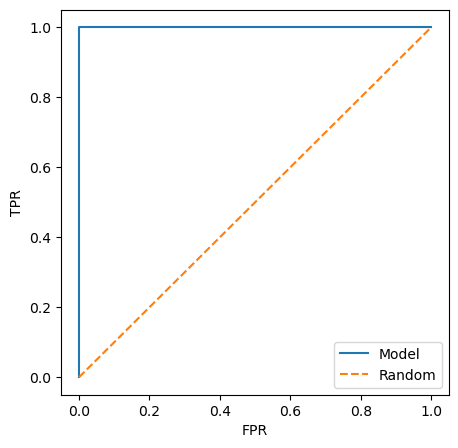

In [18]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [19]:
auc(fpr, tpr)

0.9999938095061224

In [20]:
roc_auc_score(y_val, y_pred)

0.9999938095061224

Question 3

In [21]:
thresholds = np.linspace(0, 1, 101)

In [22]:
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    scores.append((t, tp, fp, fn, tn, p, r))
    
columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'Precision', 'Recall']
df_scores = pd.DataFrame(scores, columns=columns)   
df_scores

,threshold,tp,fp,fn,tn,Precision,Recall
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,654,44,0,1685,0.936963,1.000000
2,0.02,654,37,0,1692,0.946454,1.000000
3,0.03,654,32,0,1697,0.953353,1.000000
4,0.04,654,31,0,1698,0.954745,1.000000
...,...,...,...,...,...,...,...
96,0.96,627,0,27,1729,1.000000,0.958716
97,0.97,624,0,30,1729,1.000000,0.954128
98,0.98,619,0,35,1729,1.000000,0.946483
99,0.99,613,0,41,1729,1.000000,0.937309


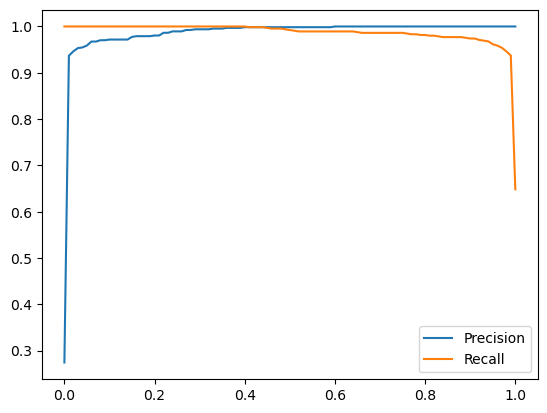

In [23]:
plt.plot(df_scores.threshold, df_scores['Precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['Recall'], label='Recall')
plt.legend()

Quesion 4

In [24]:
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    f1 = 2*(p*r)/(p+r)
    scores.append((t, f1))

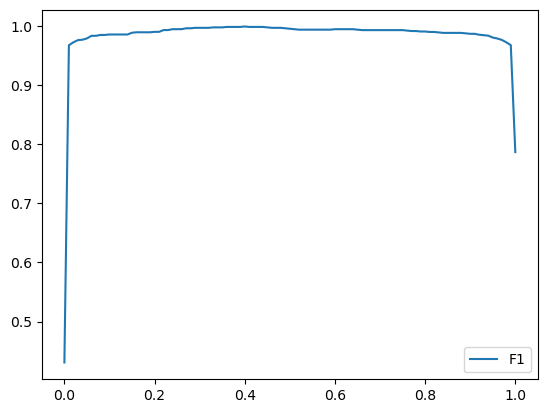

In [25]:
columns = ['threshold', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)   

plt.plot(df_scores.threshold, df_scores['f1'], label='F1')
plt.legend()

Question 5

In [26]:
from sklearn.model_selection import KFold

In [27]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[cat + num].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [28]:
def predict(df, dv, model):
    dicts = df[cat + num].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [29]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, 1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    print(auc)
    scores.append(auc)

0.9999917498556224
0.9999986255882483
0.9999986057665495
0.9999999999999999
0.9999986124986125


In [32]:
scores

[0.9999917498556224,
 0.9999986255882483,
 0.9999986057665495,
 0.9999999999999999,
 0.9999986124986125]

In [30]:
np.std(scores).round(3)

0.0

Question 6

In [33]:
for c in [0.01, 0.1, 0.5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, c)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('c=%s %.3f +- %.3f' % (c, np.mean(scores), np.std(scores)))   

c=0.01 1.000 +- 0.000
c=0.1 1.000 +- 0.000
c=0.5 1.000 +- 0.000
c=10 1.000 +- 0.000
